# Heart Diesase Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df = df.head(50000)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.shape

(50000, 22)

## Data Preprocessing

In [4]:
df.dropna(inplace=True) 

# Normalize features
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 
            'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
            'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']
X = df[features]
y = df['HeartDiseaseorAttack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Feature Selection

In [5]:
# Feature Selection using RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_scaled, y)

# Print the selected features
selected_features = np.array(features)[fit.support_]
print("Selected Features: ", selected_features)

Selected Features:  ['HighBP' 'BMI' 'Stroke' 'PhysActivity' 'Fruits' 'Veggies' 'GenHlth'
 'MentHlth' 'PhysHlth' 'Age']


## Model Development


In [6]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

In [8]:
results = {}
for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression    0.9106   0.585635  0.114595  0.191682
Decision Tree          0.8523   0.239623  0.274595  0.255919
Random Forest          0.9027   0.402439  0.107027  0.169086
SVM                    0.9089   0.587500  0.050811  0.093532


In [9]:
# Cross-Validation and Hyperparameter Tuning
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    }
}

for model_name, params in param_grid.items():
    grid = GridSearchCV(models[model_name], param_grid=params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Best params for {model_name}: {grid.best_params_}")


Best params for Random Forest: {'max_depth': 10, 'n_estimators': 100}


In [14]:
# Validation and Testing
best_model = RandomForestClassifier(n_estimators=100, max_depth=10)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))
print("Validation Precision: ", precision_score(y_test, y_pred))
print("Validation Recall: ", recall_score(y_test, y_pred))
print("Validation F1 Score: ", f1_score(y_test, y_pred))

Validation Accuracy:  0.9093
Validation Precision:  0.625
Validation Recall:  0.04864864864864865
Validation F1 Score:  0.09027081243731194


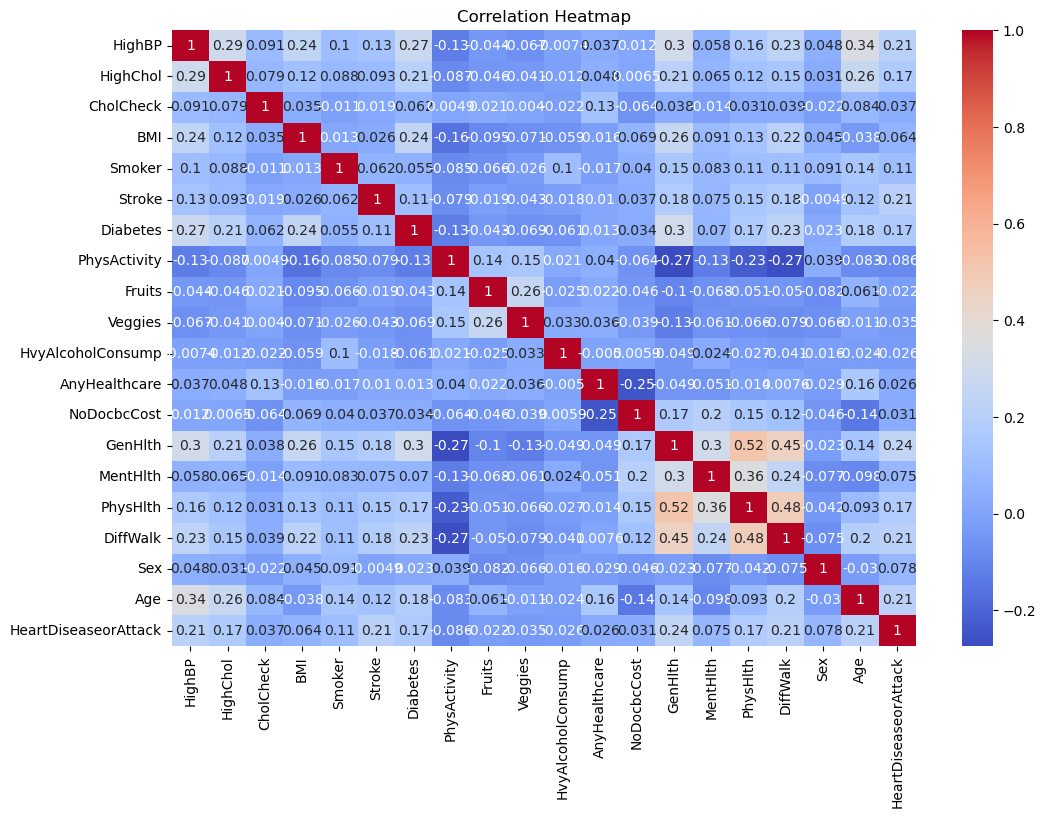

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[features + ['HeartDiseaseorAttack']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()